In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Runge-Kutta implementation as function
# def rk4(f,t0,tN, N):
#   """
#   Runge-Kutta 4th order implementation
#   Parameters
#   ----------
#   f : Function
#         Source function f(x,t)
#   t0 : Float
#         Initial time
#   tN : Float
#         Final time
#   N : Integer
#         Number of steps
#   """
#   t = np.linspace(t0, tN, N)
#   x = np.zeros(N)

#   h = (tN-t0)/N
#   for n in range(1,N):
#     k1 = h*f(x[n-1]       , t[n-1]      )
#     k2 = h*f(x[n-1] + k1/2, t[n-1] + h/2)
#     k3 = h*f(x[n-1] + k2/2, t[n-1] + h/2)
#     k4 = h*f(x[n-1] + k3  , t[n-1] + h  )

#     x[n] = x[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6
#   return t, x

# # Source function f(x,t)
# def f(x_,t_):
#   """
#   Source function f(x,t)
#   Parameters
#   ----------
#   x_ : Float
#         Value of x
#   t_ : Float
#         Value of t
#   """
#   return np.cos(x_) + np.sin(t_)

In [3]:
# solver = rk4(f, 0,10.0, 100)

In [4]:
# plt.figure(figsize=(10,6))
# plt.plot(solver[0],solver[1])
# plt.show()

In [5]:
# Define function that incorporates a a quadratic term as a drag
g = 9.8
c_d=.45
rho=1
area= 1.26*10**-3 #cross sectional area of ping pong ball in m^2
mass=2.7*10**-3 #mass of ping pong ball in kg
gamma = .5*(1/mass)*rho*area*c_d

def drag(v_):
  """
  Function that incorporates a quadratic term as a drag
  Parameters
  ----------
  v_ : Float
        Value of v
  g : Float
        Value of g
  """
  return gamma*np.square(v_) - g

# Implementing solver as a function
def rk4_drag(f,t0,tN, N):
  """
  Runge-Kutta Implementation:

  """
  t = np.linspace(t0, tN, N)
  v = np.zeros(N)
  y = np.zeros(N)
  h = (tN-t0)/N
  for n in range(1,N):
    k1 = h*f(v[n-1]       )
    k2 = h*f(v[n-1] + k1/2)
    k3 = h*f(v[n-1] + k2/2)
    k4 = h*f(v[n-1] + k3  )

    v[n] = v[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    y[n] = y[n-1] + v[n]*h
  return t, y, v

In [6]:
# Define initial conditions and number of steps
t0 = 0
tf = 0.5
N  = 50
# Solve the ODE
solver_drag = rk4_drag(drag,t0,tf, N)

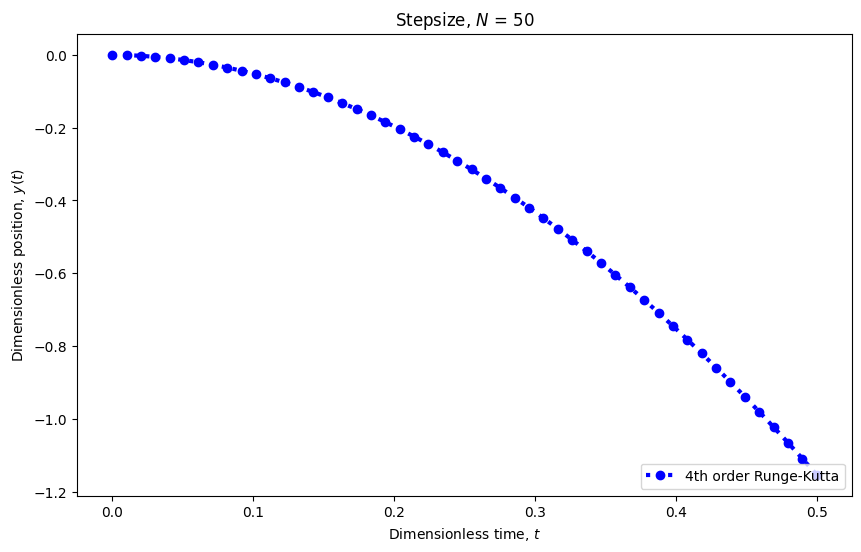

In [7]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[1],':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'Dimensionless position, $y(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % 50)
plt.legend(loc=4)
plt.show()

In [8]:
# # Runge-Kutta Implementation
# # Define initial conditions
# t0 = 0
# tN = 10.0
# N = 15
# t = np.linspace(t0, tN, N)
# h = (tN-t0)/N
# x_4RK = np.zeros(N)

# # Source function f(x,t)
# def f2(x_,t_):
#   return np.cos(x_) + np.sin(t_)


# # Actual implementation
# for n in range(1,N):
#   k1 = h*f(x_4RK[n-1]       , t[n-1]      )
#   k2 = h*f(x_4RK[n-1] + k1/2, t[n-1] + h/2)
#   k3 = h*f(x_4RK[n-1] + k2/2, t[n-1] + h/2)
#   k4 = h*f(x_4RK[n-1] + k3  , t[n-1] + h  )

#   x_4RK[n] = x_4RK[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6

In [9]:
# plt.figure(figsize=(10,6))
# plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
# plt.ylabel(r'Dimensionless position, $x(t)$')
# plt.xlabel(r'Dimensionless time, $t$')
# plt.title(r'Stepsize, $N$ = %i' % N)
# plt.legend(loc=4)
# plt.show()

In [10]:
# # Source function f(x,t)
# def g(x_):
#   return np.cos(x_)

# # Actual implementation
# for n in range(1,N):
#   k1 = h*g(x_4RK[n-1])
#   k2 = h*g(x_4RK[n-1] + k1/2)
#   k3 = h*g(x_4RK[n-1] + k2/2)
#   k4 = h*g(x_4RK[n-1] + k3  )

#   x_4RK[n] = x_4RK[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6